<a href="https://colab.research.google.com/github/leeinhodev/machine_learning/blob/main/linear_regreesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("/content/drive/MyDrive/machine_learning/linear_regression/kc_house_data.csv", usecols=["price", 'sqft_living'])
data

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


(17290, 1)
(17290, 1)


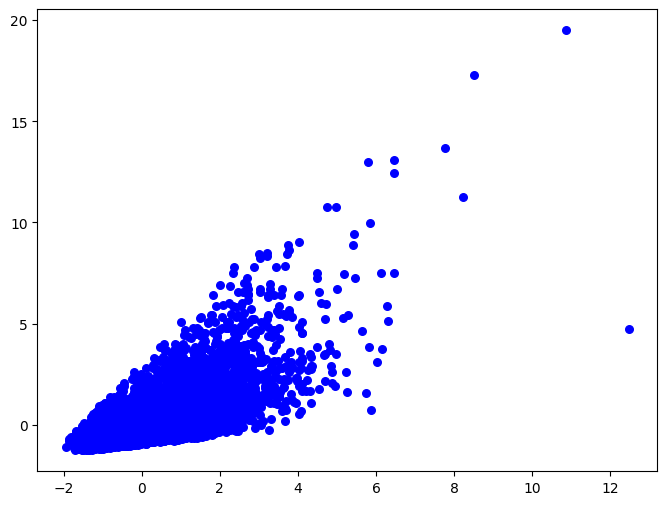

In [5]:
data_np = np.array(data)

x = data_np[:, 1]
y = data_np[:, 0]

x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

x = (x - x_mean) / x_std
y = (y - y_mean) / y_std

x = np.expand_dims(x, 1)
y = np.expand_dims(y, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

print(x_train.shape)
print(y_train.shape)

fig = plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, color='b', marker='o', s=30)
plt.show()

In [6]:
def LSM(x, y):
  # 행렬 X에 bias 열 추가
  bias = np.ones_like(x)
  X = np.hstack([x, bias])

  # X transepose 생성
  XT = X.T

  # X^T * X 생성
  XTX = np.dot(XT, X)

  # (X^T * X)^-1 생성
  XTX_inverse = np.linalg.inv(XTX)

  # X^T * Y 생성
  XTY = np.dot(XT, y)

  # theta 계산
  theta = np.dot(XTX_inverse, XTY)

  w = theta[0]
  b = theta[1]

  return w, b

In [7]:
w, b = LSM(x_train, y_train)
print(w, b)

[0.70406843] [0.00267388]


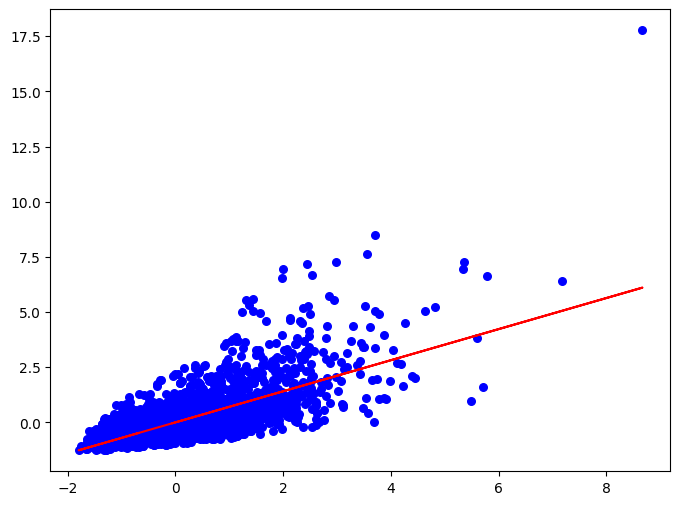

In [8]:
# Test dataset을 이용한 예측
y_ = []
for i in x_test:
  y_.append(i*w + b)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_, color='r')
plt.show()

In [9]:
def GDM(x, y):
  # 하이퍼 파라미터 설정
  learning_rate = 0.1
  n_iters = 100

  # w, b 초기값 설정
  w = 0
  b = 0

  # 행렬 X에 bias 열 추가
  bias = np.ones_like(x)
  X = np.hstack([x, bias])


  for i in range(n_iters):
    # [[w],
    #  [b]] 행렬 생성
    theta = np.array([[w], [b]])
    theta = theta.reshape(2, 1)

    # y_hat 계산
    y_hat = np.dot(X, theta)

    # dw, db 계산
    # dw = 2/N * sum((y - y_hat) * -X) (* bias 열 없는 X)
    # db = 2/N * sum((y - y_hat) * -1)
    N = x.shape[0]
    dw = 2/N * np.sum((y - y_hat) * (-x))
    db = 2/N * np.sum((y - y_hat) * -1)

    # w, b 업데이트
    # w_t+1 = w_t - learning rate * dw
    # b_t+1 = b_t - learning rate * db
    w = w - learning_rate * dw
    b = b - learning_rate * db


  return w, b

In [10]:
w, b = GDM(x_train, y_train)
print(w, b)

0.704068428840673 0.002673881249763682


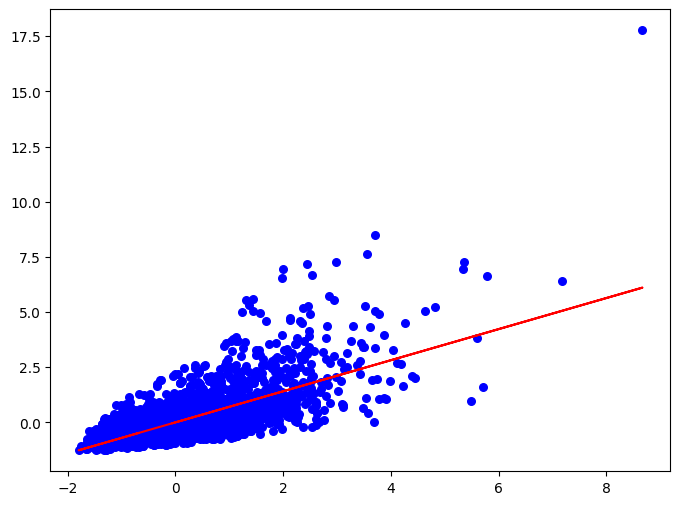

In [11]:
# Test dataset을 이용한 예측
y_ = []
for i in x_test:
  y_.append(i*w + b)

# 시각화
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, color='b', marker='o', s=30)
plt.plot(x_test, y_, color='r')
plt.show()